In [1]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

sns.set_style('whitegrid')
%matplotlib inline

# load the messy data
messy_ufodata = pd.read_csv('nuforc_reports.csv')

# load the cleaned data
ufodata = pd.read_csv('ufodata_version2.csv', engine='python')

#### This is what the original data looks like before the Data Cleaning process

In [2]:
nulval = messy_ufodata.isnull().sum()
print('Missing value in %: ')
round((nulval/ufodata.shape[0])*100, 2)

Missing value in %: 


summary            0.04
city               0.31
state              6.87
date_time          1.56
shape              3.28
duration           4.16
stats              0.05
report_link        0.00
text               0.07
posted             1.56
city_latitude     21.14
city_longitude    21.14
dtype: float64

<AxesSubplot:>

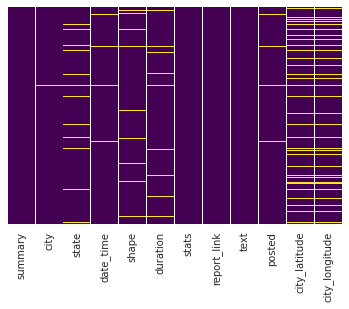

In [3]:
# plot missing values using heatmap to get an overall distribution
sns.heatmap(messy_ufodata.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### After cleaning

<AxesSubplot:>

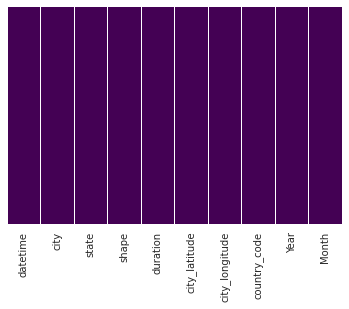

In [4]:
sns.heatmap(ufodata.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
ufodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76215 entries, 0 to 76214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        76215 non-null  object 
 1   city            76215 non-null  object 
 2   state           76215 non-null  object 
 3   shape           76215 non-null  object 
 4   duration        76215 non-null  float64
 5   city_latitude   76215 non-null  float64
 6   city_longitude  76215 non-null  float64
 7   country_code    76212 non-null  object 
 8   Year            76215 non-null  int64  
 9   Month           76215 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 5.8+ MB


In [6]:
ufodata.describe()

duration  city_latitude  city_longitude          Year  \
count   76215.000000   76215.000000    76215.000000  76215.000000   
mean      868.568799      38.095129      -88.640328   2011.072952   
std      4294.287120       9.051855       33.965907      7.284035   
min         0.000000     -53.162569     -176.645751   1969.000000   
25%        30.000000      34.085300     -111.865064   2009.000000   
50%       180.000000      39.219869      -87.361034   2012.000000   
75%       600.000000      42.463577      -78.898136   2015.000000   
max    331200.000000      73.337473      178.442166   2019.000000   

              Month  
count  76215.000000  
mean       6.956111  
std        3.221277  
min        1.000000  
25%        4.000000  
50%        7.000000  
75%       10.000000  
max       12.000000

In [7]:
ufodata.head()

datetime        city state      shape  duration  city_latitude  \
0  1969-01-08 21:30:00  Pittsburgh    PA      other     300.0      40.443092   
1  1969-03-01 00:00:00       Omaha    NE       oval       1.0      41.254852   
2  1969-03-15 11:00:00    Oroville    WA      cross     120.0      48.879100   
3  1969-03-15 21:00:00  Little Axe    OK  rectangle      60.0      35.232570   
4  1969-03-17 20:00:00      Odessa    WA     circle     600.0      47.340700   

   city_longitude country_code  Year  Month  
0      -79.974242           US  1969      1  
1      -96.064828           US  1969      3  
2     -119.224500           US  1969      3  
3      -97.212528           US  1969      3  
4     -118.669300           US  1969      3

# Data Analysis

### Questions to explore:

* What are the times and seasons that have the most frequent ufo sightings and why?
* Why are the incidents more frequent in some regions?
* What are some potential drivers for the incidents?

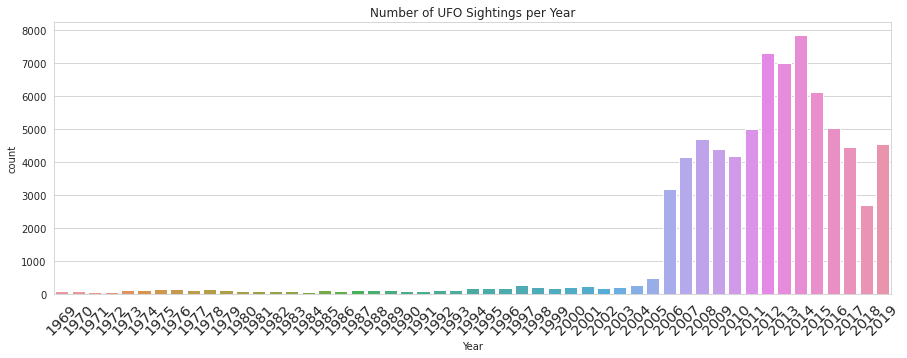

In [8]:
plt.figure(figsize=(15,5))
yearplot = sns.countplot(x=ufodata['Year'])
yearplot.set(title='Number of UFO Sightings per Year')
yearplot.set_xticklabels(yearplot.get_xticklabels(), 
                         rotation=45,
                         fontweight='light',
                         fontsize='x-large')
None

In [9]:
print('Top 10 years that have most ufo sightings:')
ufodata['Year'].value_counts()[:10]

Top 10 years that have most ufo sightings:


2014    7852
2012    7316
2013    7011
2015    6136
2016    5039
2011    5017
2008    4692
2019    4543
2017    4452
2009    4412
Name: Year, dtype: int64

The number of UFO sightings is at an increasing trend from 2006 to 2014, and it jumps from hundreds to thousands just between 2005 and 2006 years, and then it starts to decline from 2014. The peak times are at 2012 to 2014 where it is above 7000 cases. Maybe during those increasing times, social medias, movies, and cartoons about UFOs are rising and people get very interested to them, and then after 2014 [1], maybe people start to see UFO as a normal thing and not as interesting as before.

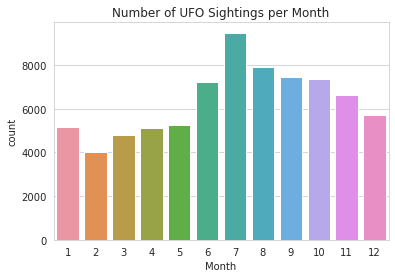

In [10]:
sns.countplot(x=ufodata['Month']).set(title='Number of UFO Sightings per Month')
None

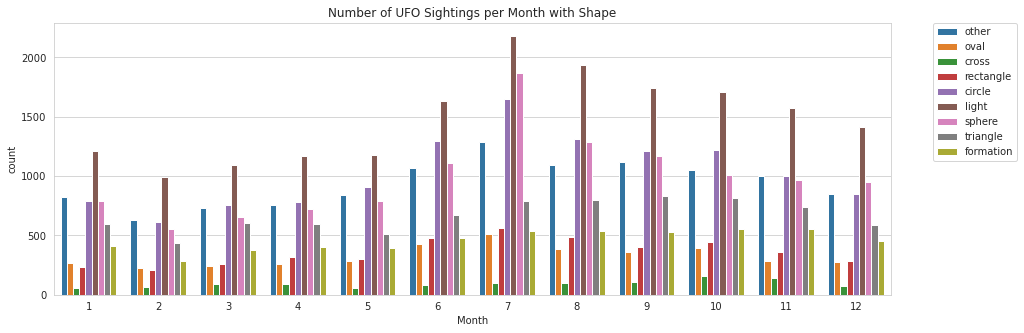

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x=ufodata['Month'], 
              hue=ufodata['shape']).set(title='Number of UFO Sightings per Month with Shape')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None

Peak months of ufo sightings is from July to August (Fig. Number of UFO Sightings per Month) which correspond to summer times, maybe during summer times people are more active and so more chances of spoting a UFO. And the most popular shape of ufo is light shaped (Fig. Occurrences of Each Shape), that make senses because most of the times when ufo appearing, it always comes with light.

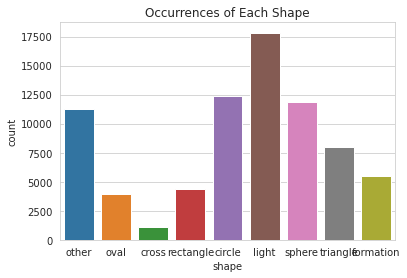

In [12]:
sns.countplot(x=ufodata['shape']).set(title='Occurrences of Each Shape')
None

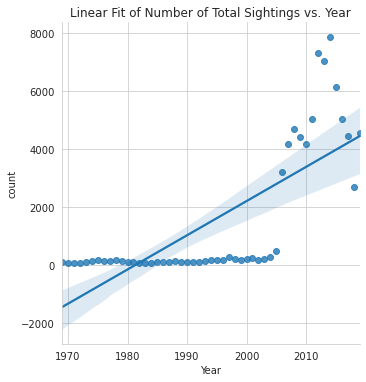

In [13]:
byYear = ufodata.groupby(ufodata['Year']).count().reset_index()
linfit = sns.lmplot(x='Year', y='city', data=byYear)
linfit.set(title='Linear Fit of Number of Total Sightings vs. Year', ylabel='count')
None

For decades since 1970, the number of ufo sightings remain fairly constant upto about year 2005. According to the linear line fit, a possible prediction for 2020 would be around 4000 to 5000 sightings. An anomaly occurs at year 2014, this can also be seen from the previous countplot (Fig. Number of UFO Sightings per Year) where the number of ufo sightings almost hits 8000 in year 2014.

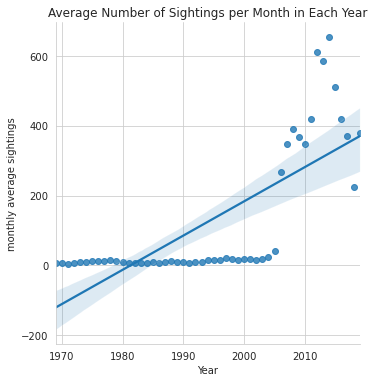

In [14]:
byYear['Avg(/mon)'] = byYear['city'].div(12).round()
linfitavg = sns.lmplot(x='Year', y='Avg(/mon)', data=byYear)
linfitavg.set(title='Average Number of Sightings per Month in Each Year', 
              ylabel='monthly average sightings')
None

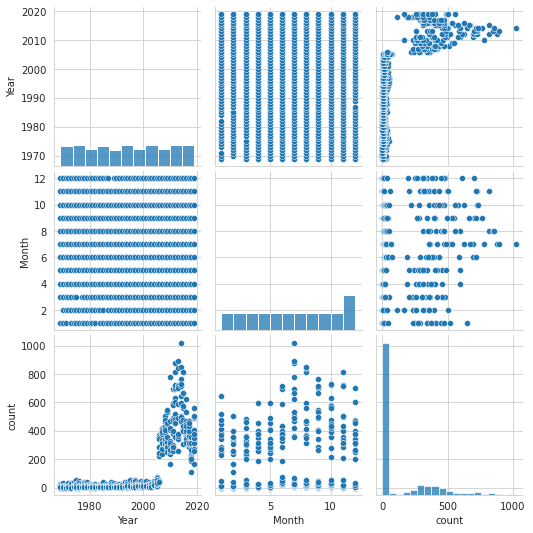

In [15]:
# Check for correlations between Year, Month, and count
byYM = ufodata.groupby(['Year', 'Month']).count().reset_index()
byYM['count'] = byYM['city']
sns.pairplot(byYM[['Year', 'Month', 'count']])
None

It doesn't look like there is any strong correlation between {year and count} and {month and count}.

## Geographical Distribution

In [16]:
ufodata['country_code'].value_counts()[:3]

US    69819
CA     2756
GB     1295
Name: country_code, dtype: int64

Top 3 countries have the most frequent ufo sightings:
* US = United States 
* CA = Canada
* GB = United Kingdom

From the joint plot below, most popular regions are clustered around United States and United Kingdom, the reason might be that these 2 countries are the ones who have the highest number of advanced military and nuclear technologies in the world.

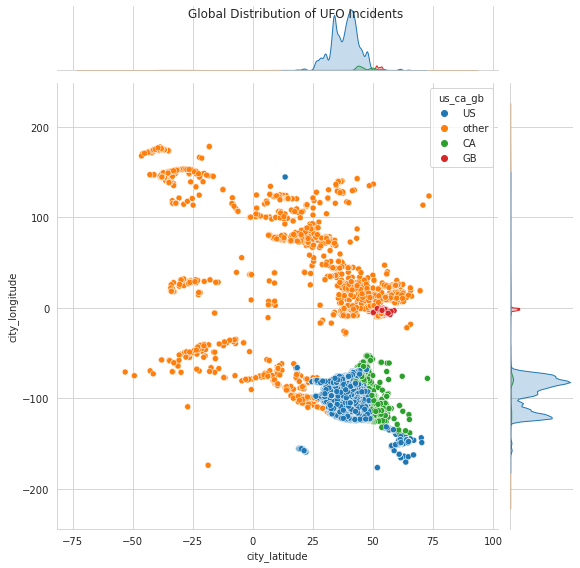

In [17]:
def get_us_ca_gb(col):
    '''
    return:
    US = United States
    CA = Canada
    GB = United Kingdom
    not US, CA, or GB = other
    '''
    
    if col[0] == 'US':
        return 'US'
    elif col[0] == 'CA':
        return 'CA'
    elif col[0] == 'GB':
        return 'GB'
    else:
        return 'other'
    
ufodata['us_ca_gb'] = ufodata[['country_code']].apply(get_us_ca_gb, axis=1)

# joint plot using latitude and longitude
sns.jointplot(x='city_latitude',
              y='city_longitude',
              hue='us_ca_gb',
              height=8,
              ratio=6,
              data=ufodata).fig.suptitle("Global Distribution of UFO Incidents")
None

In [18]:
ufodata

datetime            city state      shape  duration  \
0      1969-01-08 21:30:00      Pittsburgh    PA      other     300.0   
1      1969-03-01 00:00:00           Omaha    NE       oval       1.0   
2      1969-03-15 11:00:00        Oroville    WA      cross     120.0   
3      1969-03-15 21:00:00      Little Axe    OK  rectangle      60.0   
4      1969-03-17 20:00:00          Odessa    WA     circle     600.0   
...                    ...             ...   ...        ...       ...   
76210  2019-12-22 20:35:00        Fishkill    NY     circle      60.0   
76211  2019-12-22 21:00:00       Bethlehem    PA      other    3600.0   
76212  2019-12-22 22:15:00  Kennett Square    PA   triangle     180.0   
76213  2019-12-22 23:00:00       Clarkston    MI     circle     300.0   
76214  2019-12-29 20:40:00      Wilmington    NC  rectangle      10.0   

       city_latitude  city_longitude country_code  Year  Month us_ca_gb  
0          40.443092      -79.974242           US  1969      1       US  
1          41.254852      -96.064828           US  1969      3       US  
2          48.879100     -119.224500           US  1969      3       US  
3          35.232570      -97.212528           US  1969      3       US  
4          47.340700     -118.669300           US  1969      3       US  
...              ...             ...          ...   ...    ...      ...  
76210      41.527700      -73.907200           US  2019     12       US  
76211      40.635039      -75.371432           US  2019     12       US  
76212      39.846800      -75.711600           US  2019     12       US  
76213      42.739865      -83.417150           US  2019     12       US  
76214      34.238375      -77.878468           US  2019     12       US  

[76215 rows x 11 columns]

In [19]:
###########################################################################################
## Please run the notebook so that you can see the world map plot produced by this block ##
## THANK YOU!                                                                            ##
###########################################################################################

byCountry = ufodata.groupby(['country_code']).count().reset_index()
byCountry['count'] = byCountry['city']
byCountry['country_name'] = byCountry['country_code'].apply(lambda x: pycountry.countries.get(alpha_2=x).name)

data = dict(
        type = 'choropleth',
        locations = byCountry['country_name'],
        locationmode = 'country names',
        z = byCountry['count'],
        text = byCountry['country_name'],
        colorbar = {'title' : 'Global Number of UFO  sightings'},
        reversescale = True
      ) 

layout = dict(
    title = 'Global UFO Incidents',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Data forecasting

* Predicting the number of ufo sightings in 2020 Jan. (Regression)
* Predicting the shape of ufo in 2020 Jan. (Classification)
* Predicting the region that ufo sighting is most likely to occur in 2020 Jan. (Classification)

## 1). Volume prediction

Based on the plot in the linear fit graph from earlier, I decide to use a LinearRegressor for prediction.

In [20]:
from sklearn.linear_model import LinearRegression

X_data = byYM[['Year', 'Month']]
y_data = byYM['count']
reg = LinearRegression().fit(X_data, y_data)
result = reg.predict([[2020, 1]])

print('The total number of ufo sightings in 2020 January is predicted to be:', round(result[0]))

The total number of ufo sightings in 2020 January is predicted to be: 353


Just a quick check, multiply this number 353 by 12 months, we get roughly 4236 which matches our first guess in the linear line fit plot.

## 2). Shape prediction

In [21]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
le = preprocessing.LabelEncoder()

In [22]:
# encode the labels
shapes = ufodata['shape'].unique()
le.fit(shapes)
# le.classes_

X_data = ufodata[['Year', 'Month']]
y_data = le.transform(ufodata['shape'])

# train the classifier
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_data, y_data)

# make prediction
result = le.inverse_transform(rf.predict([[2020, 1]]))
print('The shape of the ufo sighting in 2020 January is most likely to be', result[0])

The shape of the ufo sighting in 2020 January is most likely to be light


This prediction result also matches our analysis that light shaped ufo sighting is the most popular one.

## 3). Region prediction

There is an extreme class imbalance problem, so taking only the first 15 countries for region prediction.

In [23]:
most_frequent = ufodata['country_code'].value_counts()[:15].index
ufodata['mf'] = ufodata['country_code'].apply(lambda x: x in most_frequent)
mf_ufodata = ufodata[ufodata['mf']==True]
mf_ufodata.drop(['mf'], axis=1, inplace=True)

/home/mary/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



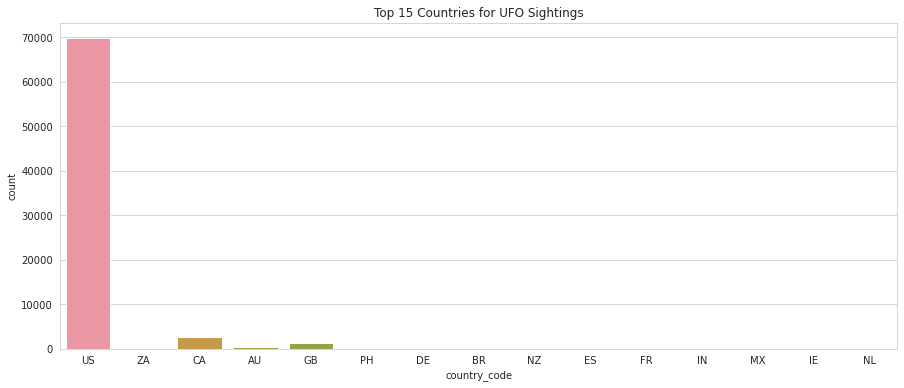

In [24]:
# take a look at the country distribution
plt.figure(figsize=(15,6))
sns.countplot(x=mf_ufodata['country_code']).set(title='Top 15 Countries for UFO Sightings')
None

United States has the most ufo sightings occuring and the next 2 countries are Canada and United Kingdom. Even though Canada and UK are ranked 2nd and 3rd, US is still 10x the number of Canada and UK. The reason might be that there are a lot of secret military sites used to test aerial surveillance and nuclear missile sites in US. [2] Those out-of-space creatures who use advanced technologies might also like the advanced technologies on Earth, especially in the US.

In [25]:
# as always, encode the labels
countries = mf_ufodata['country_code'].unique()
le.fit(countries)

X_data = mf_ufodata[['Year', 'Month']]
y_data = le.transform(mf_ufodata['country_code'])

# train the classifier
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_data, y_data)

# make prediction
result = le.inverse_transform(rf.predict([[2020, 1]]))
print('As expected, in 2020 January, ufo sighting is most likely to occur in', result[0])

As expected, in 2020 January, ufo sighting is most likely to occur in US


#### References
[1] https://www.theguardian.com/world/2018/sep/21/what-is-behind-the-decline-in-ufo-sightings

[2] \textit{"REPORT ON THE UFO WAVE OF 1947"} by Ted Bloecher, University of Arizona 1967.